In [12]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [2]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    descriminant:int
    result:str

In [5]:
def show_equation(state:QuadState):

   equation = f"{state['a']}X^2 + {state['b']}X + {state['c']}"
   return {'equation':equation}

In [ ]:
def calculate_descriminant(state:QuadState):
    answer=state['b']**2-(4*state['a']*state['c'])

    return {'descriminant':answer}

In [16]:
import math
def real_roots(state:QuadState):

    root1=(-state['b'] + math.sqrt(state['descriminant']))/2*state['a']

    root2=(-state['b'] - math.sqrt(state['descriminant']))/2*state['a']

    result=f'The roots are {root1} and {root2}'

    return {'result':result}

In [ ]:

def repeated_roots(state:QuadState):

    root1=(-state['b'])/2*state['a']

    result=f'only repeated root {root1}'

    return {'result':result}


In [11]:
def no_real_roots(state:QuadState):

    result=f'no real roots'

    return {'result':result}


In [24]:
def cheack_condition(state:QuadState)->Literal['real_roots','repeated_roots','no_real_roots']:

    if state['descriminant']>0:
        return 'real_roots'
    elif state['descriminant']==0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

In [25]:
graph=StateGraph(QuadState)

graph.add_node("show_equation",show_equation)
graph.add_node("calculate_descriminant",calculate_descriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)


graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_descriminant')
graph.add_conditional_edges('calculate_descriminant',cheack_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow=graph.compile()

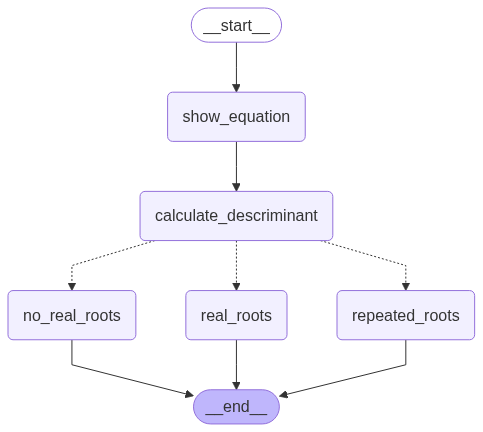

In [26]:
workflow

In [27]:
intial_state={
    'a':2,
    'b':4,
    'c':2
}

workflow.invoke(intial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2X^2 + 4X + 2',
 'descriminant': 0,
 'result': 'only repeated root -4.0'}